# The Sparks Foundation- Data Science and Bussiness Analytics
# Done By - Mithilesh Dalvi
# Task 1: Prediction using Supervised Machine Learning
# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error 

import warnings
warnings.filterwarnings(action="ignore")

# Load the data from web

In [2]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

In [3]:
df= pd.read_csv(url)

In [4]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data Analysis

In [5]:
df.shape

(25, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

# EDA

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

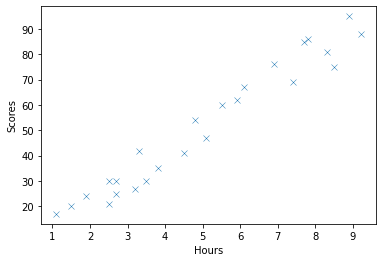

In [9]:
sns.scatterplot(x=df['Hours'], y=df["Scores"],marker="x")

There is a positive corrleation/ linear relationship between columns of hours and scores.

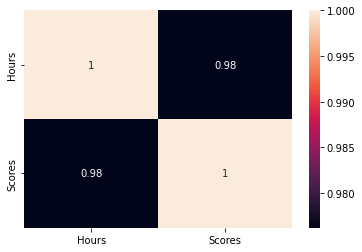

In [10]:
sns.heatmap(df.corr(), annot=True);

In [11]:
X=df['Hours']
y=df['Scores']

# Training the data

In [12]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test= model_selection.train_test_split(X,y,test_size=0.1,random_state=0)

In [13]:
X_train=X_train.values.reshape(-1, 1)

In [14]:
X_test=X_test.values.reshape(-1, 1)

In [15]:
lr=LinearRegression()

In [16]:
lr.fit(X_train, Y_train)

LinearRegression()

# Predicting the values for training and testing dataset

In [17]:
y_train_pred= lr.predict(X_train)

In [18]:
y_test_pred= lr.predict(X_test)

## Accuracy on training dataset

In [19]:
print ("R2 Score of training dataset: ", r2_score(Y_train, y_train_pred))

R2 Score of training dataset:  0.9529891020405062


## Accuracy on testing dataset

In [20]:
print ("R2 Score of testing dataset : ", r2_score(Y_test, y_test_pred))

R2 Score of testing dataset :  0.9298077534821835


## Mean Squared Error

In [21]:
print("Mean Squared Error of Testing dataset: " ,np.sqrt(mean_squared_error(Y_test, y_test_pred)))

Mean Squared Error of Testing dataset:  5.732850045774972


## Visualising the results

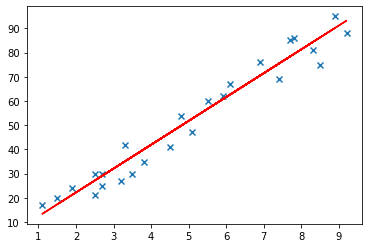

In [22]:
m=lr.coef_
c=lr.intercept_
line=m*X+c
plt.plot(X,line,'r')
plt.scatter(X,y,marker='x' )

plt.show()

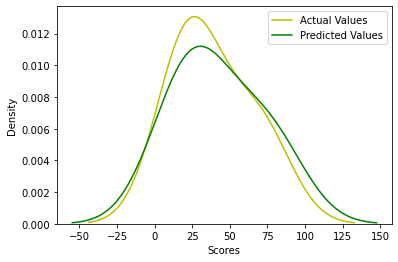

In [23]:
ax=sns.distplot(Y_test, hist=False, color='y', label='Actual Values')
sns.distplot(y_test_pred, hist=False, color='g', ax=ax, label="Predicted Values")
ax.legend();

# Predicting score for hours=9.25

In [25]:
l=[[9.25]]
y_test_pred= lr.predict(l)
print("Prdicted score for hours = 9.25 is :",y_test_pred)

Prdicted score for hours = 9.25 is : [93.67656425]


# Thank You !